# SCIPY Z KURSU

Biblioteka stworzone głównie w celu:
- wykonywania całkowania i pochodnych
- obliczeń algebry liniowej
- wielowymiarowych operacji na danych
- przeprowadzania obliczeń statystycznych
- integracji z innymi językami programowania

Ma bardzo dużo składowych bibliotek z wieloma wysokopoziomowymi funkcjami, które wyręczają użytkownika w żmudnych obliczeniach. Jest zbudowana na NumPy, wiec jest bardzo sprawna.

Podstawowymi częściami są:
- IO
- Integration
- Optimize
- Linear Algebra
- Statiscics
- Weave Packages

Dodatkowo SciPy zawera:
- algorytmy grupujące                  (**cluster**)
- stałe                                (**constants**)
- szybką transformatę Fouriera - FFT   (**fftpack**)
- moduł obliczeniowy do pochodnych     (**integrate**)
- algorytmy do obliczeń przestrzennych (**spatial**) spatial - przestrzenny
- algorytmy interpolacyjne             (**interpolate**)
- IO                                   (**IO**)
- algebra liniowa                      (**linalg**)
- N-wymiarowe przetwarzanie obrazów    (**ndimage**)
- ortogonalna regresja                 (**odr**)
- optymalizacja                        (**optimize**)
- przetwarzanie sygnałów               (**signal**)
- macierze rzadkie oraz powiązane      (**sparse**) sparse - rzadki
- integracja z językiem C/C++          (**weave**)
- funkcje statystyczne                 (**stats**)
- specjalne funkcje                    (**special**)

# Całkowanie (Integration)

SciPy ma kilka metod do realizacji całkowania:
- **integrate.quad(f,a,b)**
- **integrate.dblquad(f,a,b)** <- dla podwójnej całki
- **integrate.tplquad(f,a,b)** <- dla potrójnej całki
- **integrate.nquad(f,a,b)** <- n

Koniecne jest ograniczenie co do ukrytych całek i musi być podane w formie funkcji.

In [5]:
from scipy.integrate import quad

In [6]:
def integrateFunction(x):
    return x

In [7]:
quad(integrateFunction,0,1)

(0.5, 5.551115123125783e-15)

In [8]:
def integrateFn(x,a,b):
    return x*a+b

In [9]:
a=3
b=2

In [10]:
quad(integrateFn,0,1,args=(a,b))

(3.5, 3.885780586188048e-14)

In [11]:
import scipy.integrate as integrate

In [12]:
def f(x,y):
    return (x+y)
integrate.dblquad(f,0,1,lambda x:0, lambda x:2)

(3.0, 4.436070580899685e-14)

# Optymalizacja (Optimization)

SciPy posiada zaimplementowane m.in.:
- bfgs
- Nelder-Mead simplex
- Newton Conjugate gradient
- COBYLA
- SLSQP

Przykładowe funkcje:
- **optimize.minimize(f, x0, methof='bfgs')**
- **optimize.curve_fit(f, xdata, ydata)**

In [13]:
import numpy as np
from scipy import optimize

In [14]:
def f(x):
    return x**2 + 5*np.sin(x)

In [15]:
minimalValue = optimize.minimize(f, x0=2, method='bfgs', options={'disp':True})

Optimization terminated successfully.
         Current function value: -3.246394
         Iterations: 5
         Function evaluations: 27
         Gradient evaluations: 9


In [16]:
minimalValueWithOpt = optimize.minimize(f, x0=2, method='bfgs')

In [17]:
minimalValueWithOpt

      fun: -3.2463942726915196
 hess_inv: array([[0.15445831]])
      jac: array([-4.47034836e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([-1.11051058])

In [20]:
x = np.linspace(-3,3,30)
y = f(x)

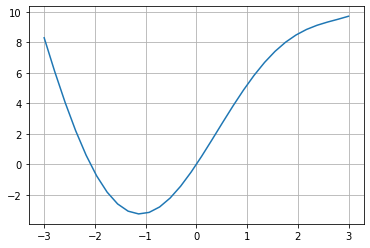

In [25]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.grid()

In [32]:
print( "dla x={} => y={}; jest to minimum".format(x[y.argmin()],y[y.argmin()]))

dla x=-1.1379310344827587 => y=-3.2439507774985357; jest to minimum


- **root**

In [33]:
from scipy.optimize import root

In [34]:
def rootfunc(x):
    return x + 3.5*np.cos(x)

In [35]:
rootValue = root(rootfunc, 0.3)

In [36]:
rootValue

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-8.32889313e-13])
       r: array([-4.28198145])
  status: 1
 success: True
       x: array([-1.21597614])

# Algebra Liniowa

- **odwrócenie macierzy** {tylko kwadratowych}

In [38]:
import numpy as np
from scipy import linalg

In [40]:
macierz = np.array([[10,6],[2,7]])
print(macierz)

[[10  6]
 [ 2  7]]


In [41]:
type(macierz)

numpy.ndarray

In [42]:
linalg.inv(macierz)

array([[ 0.12068966, -0.10344828],
       [-0.03448276,  0.17241379]])

- **wyznacznik macierzy**

In [43]:
linalg.det(macierz)

58.0

- **rozwiązywanie równań liniowych**

Przykład: <br />
2x + 3y +  z = 21<br />
-x + 5y + 4z = 9<br />
3x + 2y + 9z = 6<br />

In [44]:
from scipy import linalg

In [46]:
numArray = np.array([[2,3,1],[-1,5,4],[3,2,9]])
numArrValue = np.array([21,9,6])

In [48]:
linalg.solve(numArray,numArrValue)

array([ 4.95,  4.35, -1.95])

- **SVD** <br />
Czyli rozkład na iloczyn trzech macierzy. <br />
$A = U \Sigma V$, gdzie $U$ i $V$ - macierze ortagonalne, a $\Sigma$ - macierz diagonalna.

In [49]:
from scipy import linalg

In [50]:
numSvdArr = np.array([[3,5,1],[9,5,7]])
numSvdArr.shape

(2, 3)

In [52]:
linalg.svd(numSvdArr)
##odpowiedz zawiera tak, jak wyżej: pierwsza tablica to U, druga Sigma, a trzecia V

(array([[-0.37879831, -0.92547925],
        [-0.92547925,  0.37879831]]),
 array([13.38464336,  3.29413449]),
 array([[-0.7072066 , -0.4872291 , -0.51231496],
        [ 0.19208294, -0.82977932,  0.52399467],
        [-0.68041382,  0.27216553,  0.68041382]]))

- **Warości własne macierzy:**

In [53]:
import numpy as np
from scipy import linalg

In [59]:
test_rating_data = np.array([[5,8],[7,9]])
eigenValues, eigenVector = linalg.eig(test_rating_data)
first_eigen, second_eigen = eigenValues

In [60]:
print(first_eigen, second_eigen)

(-0.745966692414834+0j) (14.745966692414834+0j)


In [61]:
print(eigenVector[:,0])

[-0.81220939  0.58336601]


In [62]:
print(eigenVector[:,1])

[-0.63447346 -0.77294465]


# Statystyka

**CDF - Cumulative Distribution Function (dystrybuanta)**<br />
Czyli suma prawdopodobieństwa "poniżej"<br />
**PDF - Probability Density Function**<br />
Czyli taka nieujemna funkcja rzeczywista, dla której całka obliczona w odpowiednich granicach jest równa prawdopodobieństwu wystąpienia danego zdarzenia losowego. Czyli pochodna dystrybuanty, czyli normalna funkcja opisująca prawdopodobieństwo.
<br />
<br />
- Dla rozkładu normalnego:
    

In [1]:
from scipy.stats import norm

In [7]:
y = norm.rvs( loc=0, scale=1, size=100 ) #loc and scale are used to adjust the location and scale of data distribution
print(y)

[ 4.69051894e-01 -1.09587307e+00 -7.65240654e-01  1.01826269e+00
  1.06441200e+00 -3.24758573e-01 -5.83640809e-02  5.63188839e-01
  1.11242531e-01 -4.96339040e-01 -4.83862045e-01 -1.40188561e+00
 -4.51517370e-01  6.99387295e-01  6.19051927e-01  7.34874978e-01
 -5.16602922e-01  1.33302466e+00 -1.48165346e+00  5.68406458e-01
 -3.73344199e-01 -2.37656964e-01  1.91610709e+00 -6.44392107e-01
 -1.10058701e-01 -1.69096312e+00  1.22172020e+00 -4.53871877e-01
  5.58182399e-01  7.22560581e-01  5.04397414e-01 -7.73300732e-02
 -3.67083392e-01  1.36347365e+00 -6.35814503e-02 -1.04472347e+00
  3.47862054e-01 -1.29658276e+00  2.62571935e-01 -7.20663562e-01
  8.66821894e-01 -8.27937733e-01  2.03140385e+00  3.72569485e-01
 -2.37822684e+00 -5.12157063e-01 -7.60349700e-01  1.15618928e-01
  4.19818565e-01 -1.85130880e+00  1.75397405e-01 -1.29272457e+00
  1.51516463e+00 -7.19344576e-01  3.56262629e-01  1.44749550e+00
  8.97678973e-01 -3.69887560e-01  6.50540733e-01 -2.46782767e-03
 -6.82842959e-02  8.15274

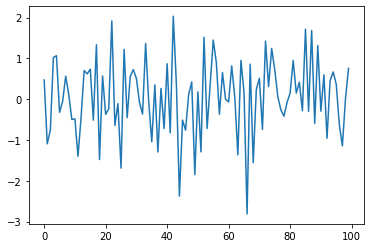

In [8]:
import matplotlib.pyplot as plt
plt.plot(y)

(array([ 2.,  1.,  5.,  6., 16., 19., 22., 16.,  9.,  4.]),
 array([-2.81400616, -2.32946516, -1.84492416, -1.36038316, -0.87584216,
        -0.39130116,  0.09323985,  0.57778085,  1.06232185,  1.54686285,
         2.03140385]),
 <BarContainer object of 10 artists>)

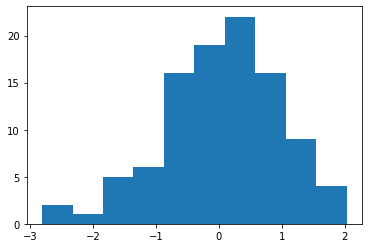

In [9]:
plt.hist(y)

In [10]:
norm.cdf(5,loc=1,scale=2) #prawdopodobieństwo tego, że wartość zmiennej jest poniżej 5

0.9772498680518208

In [12]:
norm.pdf(9,loc=0,scale=1) #prawdopodobieństwo dla 9

1.0279773571668917e-18

# Weave Package *{czyli dla wplatania kodu z C/C++}*

Wyróżnić można dwie główne funkcje:
- inline() <-- szybka kompilacja i wykonanie kodu
- blitz() <-- kompilacja wyrażenia NumPy dla szybkiej realizacji